In [0]:

# print("animal video")
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from skimage.morphology import medial_axis, skeletonize
#from timeit import default_timer as timer
print("package loaded")


package loaded


## Load Images
Missing 2nd image but found in previous email sent

In [0]:
def img2Plot(a,b,c,d,path):
    
    # Read image into numpy arr
    img= cv2.imread((path), cv2.IMREAD_GRAYSCALE) # read image in greyscale
    h,w=img.shape #512x512 image
    imgCrop=img[a:c,b:d] #30:490 , 30:490
    top, bottom, left, right = [a-1, h-c, b-1, w-d]
    img = cv2.copyMakeBorder(imgCrop, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
    
    return img 

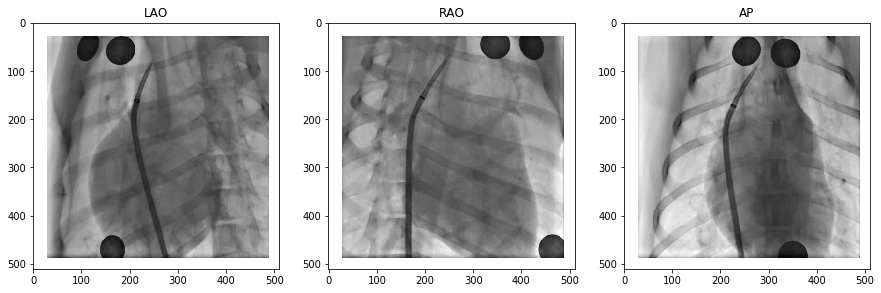

In [0]:
# Dimensions to crop black border
a=b=30
c=d=490

pathList = ['animalvideocaptures/m0012_frame0.jpg','animalvideocaptures/m0014_frame0.jpg','animalvideocaptures/AP_frame45.jpg']

img1 = img2Plot(a,b,c,d,pathList[0])
img2 = img2Plot(a,b,c,d,pathList[1])
img3 = img2Plot(a,b,c,d,pathList[2])

#cv2.imshow('LAO',img1)
#cv2.imshow('RAO',img2)
#cv2.imshow('AP',img3)
#cv2.waitKey(0)

# Pretty plot code
plt.rcParams['figure.figsize'] = [15, 7]
plt.subplot(131),plt.imshow(img1,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3,'gray'), plt.title('AP')
plt.show()


## Basic processing

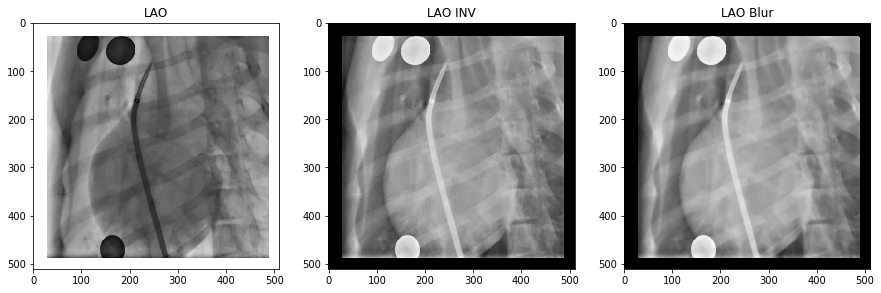

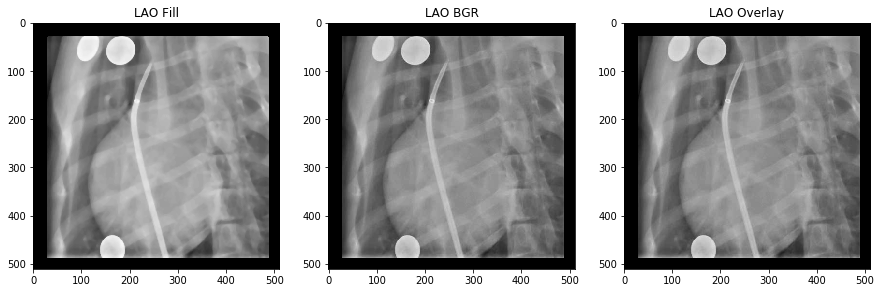

In [0]:
# Invert imgs
img1inv=cv2.bitwise_not(img1)
img2inv=cv2.bitwise_not(img2)
img3inv=cv2.bitwise_not(img3)

# Blur images using median filters
##?????????? Are we doing this to eliminate sharp edges ???????????????##

img1iblur= cv2.medianBlur(img1inv,5) 
img2iblur= cv2.medianBlur(img2inv,5)
img3iblur= cv2.medianBlur(img3inv,5)

# Copy blurred img
img1_filled=img1iblur.copy()
img2_filled=img2iblur.copy()
img3_filled=img3iblur.copy()

# Convert inverted img to BGR images
img1_bgr =cv2.cvtColor(img1inv, cv2.COLOR_GRAY2BGR)
img2_bgr =cv2.cvtColor(img2inv, cv2.COLOR_GRAY2BGR)
img3_bgr =cv2.cvtColor(img3inv, cv2.COLOR_GRAY2BGR)

# Copy bgr img to seperate overlay img
img1_overlay = img1_bgr.copy()
img2_overlay = img2_bgr.copy()
img3_overlay = img3_bgr.copy()

# Plot bois
plt.subplot(131),plt.imshow(img1,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img1inv,'gray'), plt.title('LAO INV')
plt.subplot(133),plt.imshow(img1iblur,'gray'), plt.title('LAO Blur')
plt.show()

plt.subplot(131),plt.imshow(img1_filled,'gray'), plt.title('LAO Fill')
plt.subplot(132),plt.imshow(img1_bgr,'gray'), plt.title('LAO BGR')
plt.subplot(133),plt.imshow(img1_overlay,'gray'), plt.title('LAO Overlay')
plt.show()

## Marker detection

In [0]:
def markerDetection(title,imgiblur,img_overlay,img_filled, minThresh, maxThresh, minArea, maxArea):

    aa=0

    markerPos = np.zeros(shape=(3,2), dtype=int) # creates rank 3 array with 2 zeroes
    #print(markerPos)

    # Simple Threshold is calculated to clean image produces B/W img
    ret,thresh = cv2.threshold(imgiblur,minThresh, maxThresh,0) # Simple detection only passing range of colors close to white
    # Problem with this is you have to manually adjust threshold to detect blobs(markers)
    # This is really inconsistent due to this

    # This entire part is obsolete if model is trained to detect circles and returns 

    # Adaptive threshold
    thadap = cv2.adaptiveThreshold(imgiblur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    # Find Contours (i.e. markers using OpenCV)
    contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plt.subplot(141),plt.imshow(imgiblur,'gray'), plt.title(title + ' Blur')
    plt.subplot(142),plt.imshow(thresh,'gray'), plt.title(title + ' Simple Threshold')
    plt.subplot(143),plt.imshow(thadap,'gray'), plt.title(title +' Adaptive Threshold')
    
    for i, c in enumerate(contours):
        area= cv2.contourArea(c)
        #print(area)
        if (area < minArea or area > maxArea):
            continue
        cv2.drawContours(img_filled, contours, i, 120, 4)
        ellipse = cv2.fitEllipse(c)
        x,y =int(ellipse[0][0]), int(ellipse[0][1])
        cv2.ellipse(img_overlay, ellipse, (0,255,0), 2,cv2.LINE_AA)
        cv2.circle(img_overlay,(x,y),2,(0,0,255),3)
        markerPos[aa,:]  = (x,y)
        aa +=1

    plt.subplot(144),plt.imshow(img_overlay,'gray'), plt.title(title + ' Marker Detection')
    plt.show()
    
    return img_overlay, img_filled, markerPos #, image_filled
    
    #     cv2.drawContours(img_filled,[c],0,140,-1)
    # cv2.imshow('Markers in LAO', img_overlay)
    # cv2.imshow('thresh1', thresh)
    # cv2.imshow('Markers removal-LAO',img_filled)
    # cv2.imwrite('Markers1.png',img_overlay)
    #print(ellipse.shape)
        

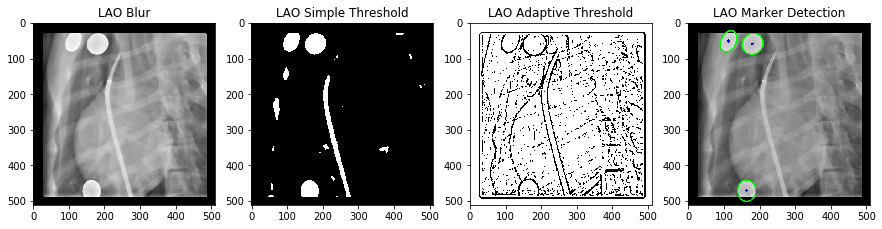

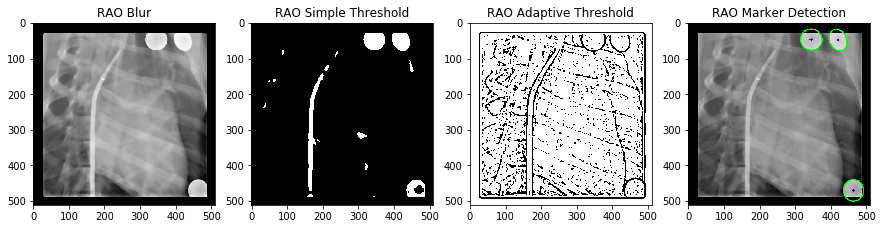

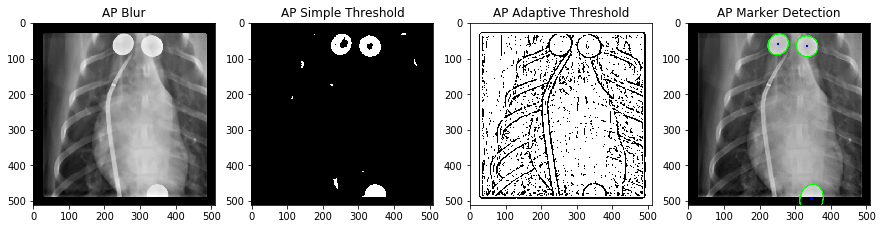

In [0]:
                                                                        #minThresh, maxThresh, minArea, maxArea
img1_overlay, img1_filled, markerposLAO = markerDetection('LAO',img1iblur,img1_overlay,img1_filled, 170, 255, 1000, 3000)
img2_overlay, img2_filled, markerposRAO = markerDetection('RAO',img2iblur,img2_overlay,img2_filled, 170, 255, 900, 3500)
img3_overlay, img3_filled, markerposAP  = markerDetection('AP', img3iblur,img3_overlay,img3_filled, 190, 255, 1000, 3500)

#RETURN MARKER POSITION & MAYBE RETURN FILLED ARRAY BC WE DRAW CONTOURS ON IT

## Catheter detection skipped: (same problem as markers but more convulted)

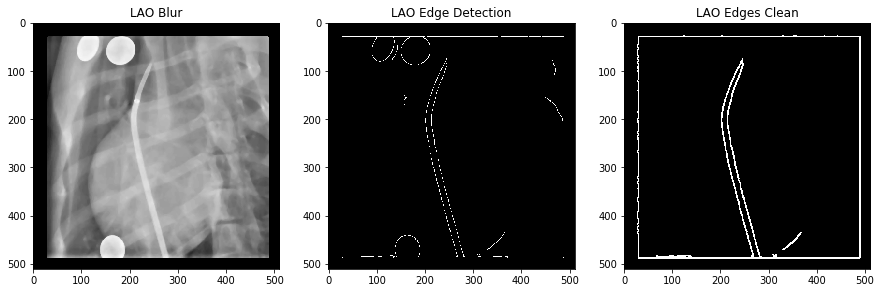

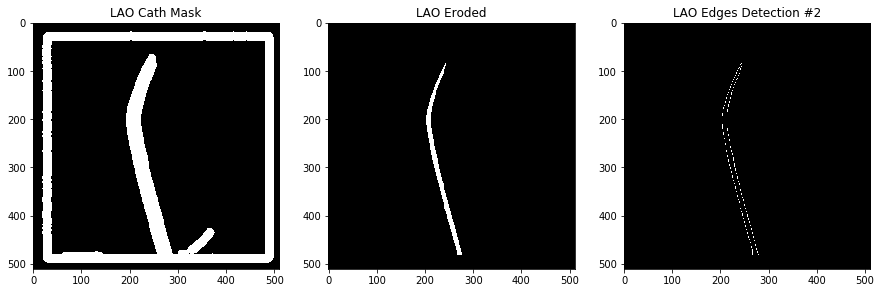

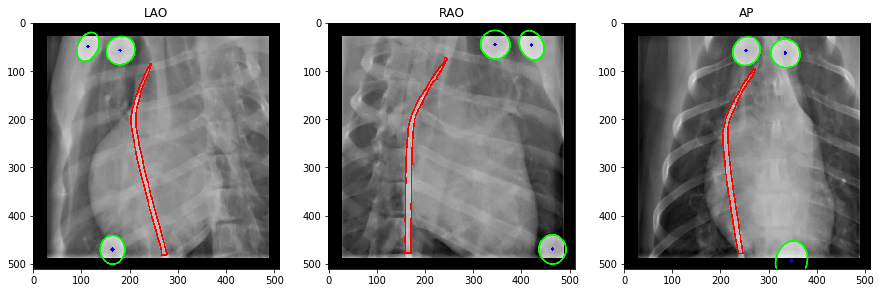

In [0]:

edges1=cv2.Canny(img1iblur, 50, 150)
edges2=cv2.Canny(img2iblur, 40, 170)
edges3=cv2.Canny(img3iblur, 90, 250)

###############  LAO  ###################
contours,hierarchy = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = [] 
for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if ((len(approx) > 1) & (len(approx) < 7) & (area > 1) ) and (width<600) and (height <1000) and (width >= 1) and (height > 1):
        contour_list.append(contour)

h, w = edges1.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath1edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 7))
# cv2.imwrite('cath1edge.png',cath1edge)
cath1=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded1 = cv2.erode(cath1.copy(),element, iterations=5)
edgesnew1=cv2.Canny(eroded1, 50, 150)
contours,hierarchy = cv2.findContours(edgesnew1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1_overlay, contours,  -1, (255,0,0), 2)

plt.subplot(131),plt.imshow(img1iblur,'gray'), plt.title('LAO Blur')
plt.subplot(132),plt.imshow(edges1,'gray'), plt.title('LAO Edge Detection')
plt.subplot(133),plt.imshow(cath1edge,'gray'), plt.title('LAO Edges Clean')
plt.show()

plt.subplot(131),plt.imshow(cath1,'gray'), plt.title('LAO Cath Mask')
plt.subplot(132),plt.imshow(eroded1,'gray'), plt.title('LAO Eroded')
plt.subplot(133),plt.imshow(edgesnew1,'gray'), plt.title('LAO Edge Detection #2')
plt.show()

###############  RAO  ###################
contours,hierarchy = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if  ((len(approx) > 1) & (len(approx) < 10) & (area > 50) ) and (width<500) and (height <1000) and (width >= 2) and (height > 2):
        contour_list.append(contour)

h, w = edges2.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath2edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
# cv2.imwrite('cath2edge.png',cath2edge)

cath2=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded2 = cv2.erode(cath2.copy(),element, iterations=5)
edgesnew2=cv2.Canny(eroded2, 50, 150)
contours,hierarchy = cv2.findContours(edgesnew2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2_overlay, contours,  -1, (255,0,0), 2)

###############  AP ###################
contours,hierarchy = cv2.findContours(edges3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if  ((len(approx) > 1) & (len(approx) < 10) & (area > 33) ) and (width<500) and (height <1000) and (width >= 2) and (height > 2):
        contour_list.append(contour)

h, w = edges3.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath3edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
# cv2.imwrite('cath3edge.png',cath3edge)
cath3=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded3 = cv2.erode(cath3.copy(),element, iterations=5) # this can remove any single-lined edges
edgesnew3=cv2.Canny(eroded3, 50, 150)
contours,hierarchy = cv2.findContours(edgesnew3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img3_overlay, contours,  -1, (255,0,0), 2)

plt.subplot(131),plt.imshow(img1_overlay,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2_overlay,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3_overlay,'gray'), plt.title('AP')
plt.show()

## Skeletonization

In [0]:
def skeleton(eroded):
    size = np.size(eroded)
    skel1 = np.zeros(eroded.shape,np.uint8)
    ret,img = cv2.threshold(eroded,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False
    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel1 = cv2.bitwise_or(skel1,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    return skel1

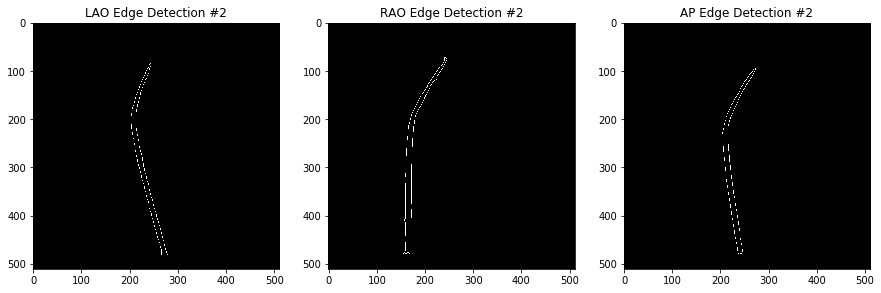

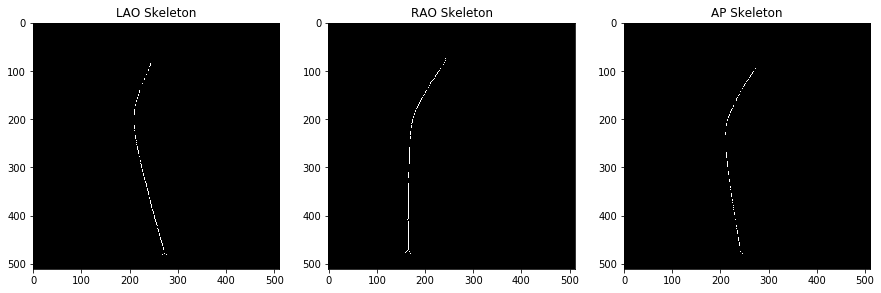

In [0]:
skel1 = skeleton(eroded1)
skel2 = skeleton(eroded2)
skel3 = skeleton(eroded3)

plt.subplot(131),plt.imshow(edgesnew1,'gray'), plt.title('LAO Edge Detection #2')
plt.subplot(132),plt.imshow(edgesnew2,'gray'), plt.title('RAO Edge Detection #2')
plt.subplot(133),plt.imshow(edgesnew3,'gray'), plt.title('AP Edge Detection #2')
plt.show()

plt.subplot(131),plt.imshow(skel1,'gray'), plt.title('LAO Skeleton')
plt.subplot(132),plt.imshow(skel2,'gray'), plt.title('RAO Skeleton')
plt.subplot(133),plt.imshow(skel3,'gray'), plt.title('AP Skeleton')
plt.show()

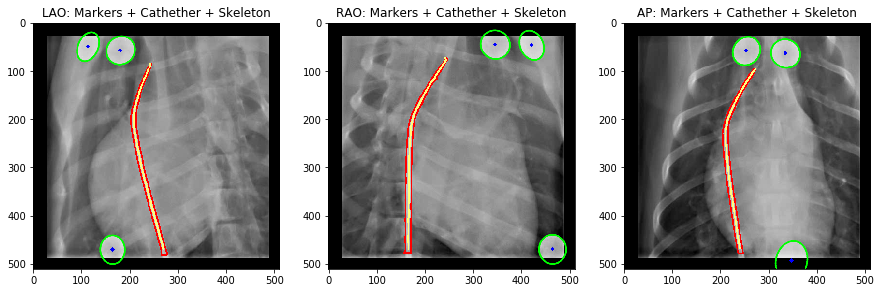

In [0]:
skel1[470:,:]=0   # Temporary removal of lower branches in skeletons
skel2[470:,:]=0
skel3[470:,:]=0

contours,hierarchy = cv2.findContours(skel1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1_overlay, contours,  -1, (255,255,127), 2)
contours,hierarchy = cv2.findContours(skel2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2_overlay, contours,  -1, (255,255,127), 2)
contours,hierarchy = cv2.findContours(skel3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img3_overlay, contours,  -1, (255,255,127), 2)
plt.subplot(131),plt.imshow(img1_overlay,'gray'), plt.title('LAO: Markers + Cathether + Skeleton')
plt.subplot(132),plt.imshow(img2_overlay,'gray'), plt.title('RAO: Markers + Cathether + Skeleton')
plt.subplot(133),plt.imshow(img3_overlay,'gray'), plt.title('AP: Markers + Cathether + Skeleton')
plt.show()

# MEAT OF NOTEBOOK

## Marker positions (relative to 512x512 frame)

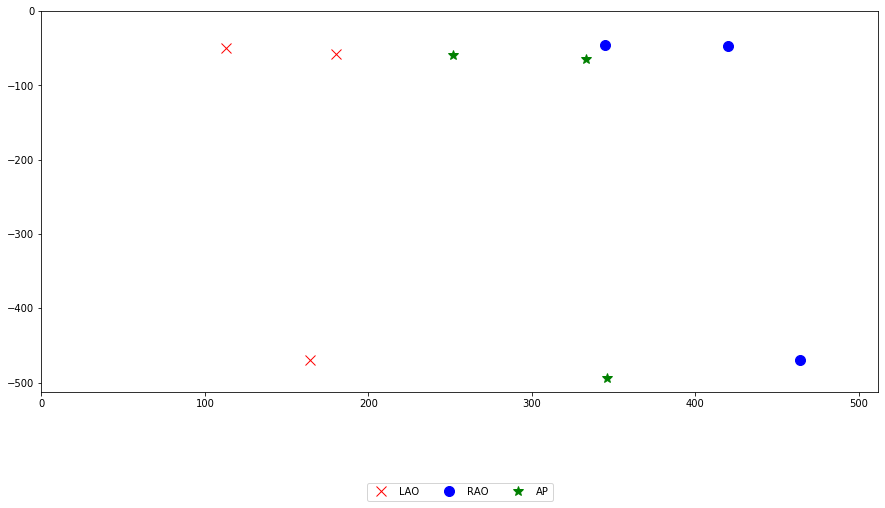

In [0]:

markerposAPcorr=markerposAP-markerposAP[0,:]
markerposLAOcorr=markerposLAO-markerposLAO[0,:]
markerposRAOcorr=markerposRAO-markerposRAO[0,:]
# markerposAPcorr1=np.column_stack((markerposAPcorr[:,1],markerposAPcorr[:,0]))
# markerposLAOcorr1=np.column_stack((markerposLAOcorr[:,1],markerposLAOcorr[:,0]))
# markerposRAOcorr1=np.column_stack((markerposRAOcorr[:,1],markerposRAOcorr[:,0]))
markerposAPcorr1=markerposAPcorr
markerposLAOcorr1=markerposLAOcorr
markerposRAOcorr1=markerposRAOcorr
plt.figure()
plt.plot(markerposLAO[:,0],-markerposLAO[:,1],'xr', markersize=10, label="LAO")
plt.plot(markerposRAO[:,0],-markerposRAO[:,1],'ob', markersize=10,label="RAO")
plt.plot(markerposAP[:,0],-markerposAP[:,1],'*g', markersize=10,label="AP")
plt.xlim(0,512)
plt.ylim(-512,0)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), fancybox=True, ncol=3)
plt.show()


[[   0.            0.            0.        ]
 [ -13.         -429.           54.5166605 ]
 [ -94.         -434.           60.81277591]
 [   0.            0.           -0.        ]
 [ -13.         -429.           65.4833395 ]
 [ -94.         -434.           75.18722409]
 [   0.            0.            0.        ]
 [ -16.16580754 -422.           60.        ]
 [ -98.14954576 -423.           68.        ]]


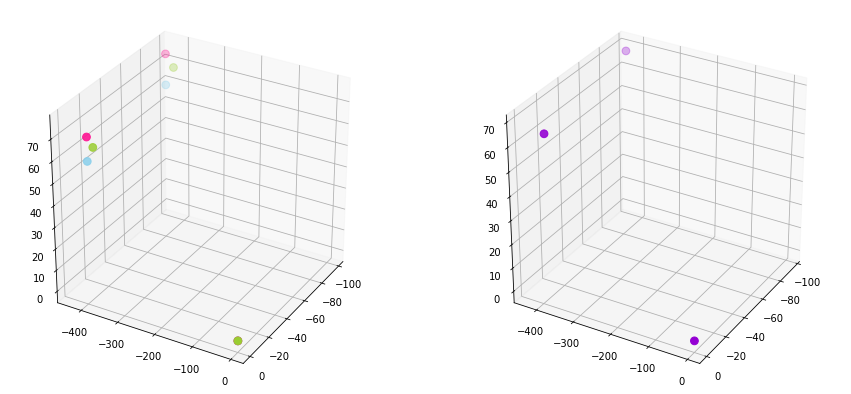


[[   0.            0.            0.        ]
 [ -14.05526918 -426.66666667   60.        ]
 [ -95.38318192 -430.33333333   68.        ]]


In [0]:

# Function for calculating Z position (referencing one of the marker)
import math
def calcZ(x1, x2, theta):
    thetaRad = theta / 180 * math.pi
    if(math.sin(thetaRad) is not 0):
        z2 = (x2*math.cos(thetaRad) - x1) / math.sin(thetaRad)
        z1 = x2*math.sin(thetaRad) + z2*math.cos(thetaRad)
    
    z1.astype(int)
    z2.astype(int)
    
    return [z1,z2] 

# AP-LAO comparison
[Z1,Z2] = calcZ(markerposAPcorr1[:,0], markerposLAOcorr1[:,0], 30)

# AP-RAO comparison
[Z1,Z2] = calcZ(markerposAPcorr1[:,0], markerposRAOcorr1[:,0], -30)

mposAPRAOforAP=np.column_stack((markerposAPcorr1,Z1))
mposAPRAOforRAO=np.column_stack((markerposRAOcorr1,Z2))

# RAO-LAO comparison
[Z1,Z2] = calcZ(markerposRAOcorr1[:,0], markerposLAOcorr1[:,0], 60)

mposRAOLAOforRAO=np.column_stack((markerposRAOcorr1,Z1))
mposRAOLAOforLAO=np.column_stack((markerposLAOcorr1,Z2))


thetaRad = 30 / 180 * math.pi
ZA1 = markerposLAOcorr1[:, 0]*math.sin(thetaRad) + Z2*math.cos(thetaRad)
XA1 = markerposLAOcorr1[:, 0]*math.cos(thetaRad) - Z2*math.sin(thetaRad)

ZA1.astype(int)
XA1.astype(int)

mposRAOLAOforAP=np.column_stack((XA1,markerposRAOcorr1[:,1],ZA1))

markers=np.vstack((mposAPLAOforAP,mposAPRAOforAP,mposRAOLAOforAP))


#K-means Clustering for marker positions to find cluster center to make one line

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(markers)
y_kmeans = kmeans.predict(markers)
centers = kmeans.cluster_centers_

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(mposAPLAOforAP[:,0],mposAPLAOforAP[:,1],mposAPLAOforAP[:,2], c='skyblue', s=60)
ax.scatter(mposAPRAOforAP[:,0],mposAPRAOforAP[:,1],mposAPRAOforAP[:,2], c='deeppink', s=60)
ax.scatter(mposRAOLAOforAP[:,0],mposRAOLAOforAP[:,1],mposRAOLAOforAP[:,2], c='yellowgreen', s=60)
ax.view_init(30, 30)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(centers[:,0],centers[:,1],centers[:,2], c='darkviolet', s=60)
ax.view_init(30, 30)
plt.show()

## Catheter positions (2D)

[[ 96. 239.]
 [143. 220.]
 [185. 209.]
 [225. 209.]
 [265. 217.]
 [307. 226.]
 [347. 236.]
 [388. 247.]
 [428. 258.]
 [468. 269.]]

[[ 96. 232.]
 [137. 206.]
 [177. 184.]
 [217. 171.]
 [257. 169.]
 [298. 167.]
 [338. 166.]
 [378. 166.]
 [418. 166.]
 [458. 166.]]

[[ 96. 272.]
 [136. 245.]
 [179. 223.]
 [219. 210.]
 [259. 211.]
 [299. 214.]
 [340. 220.]
 [381. 225.]
 [424. 232.]
 [465. 239.]]


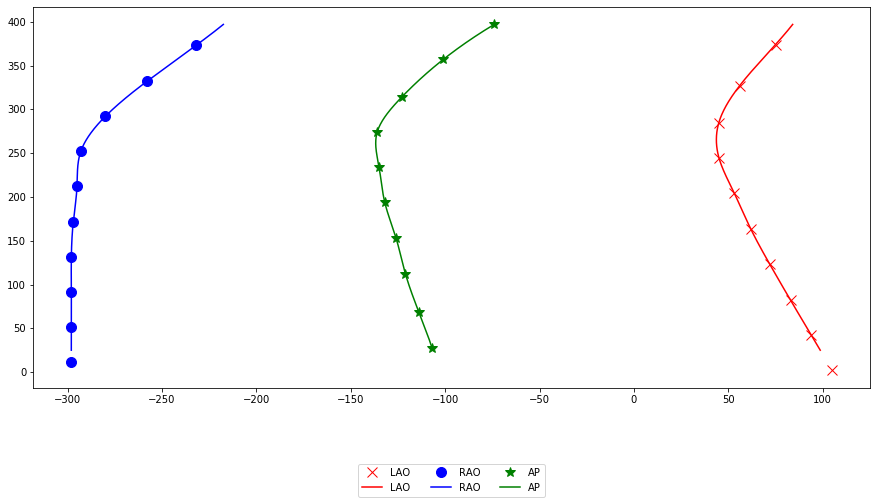

In [0]:
i1,j1= np.where(skel1 == 255)
skel1pos=np.transpose(np.array([i1, j1]))
i1min=min(i1)
i1max=max(i1)

i2,j2=np.where(skel2 ==255)
i2min=min(i2)
i2max=max(i2)

i3,j3=np.where(skel3 ==255)
i3min=min(i3)
i3max=max(i3)

imin=max(i1min,i2min,i3min)  # where catheter index should begin considering 3 views (row)
imax=min(i1max,i2max,i3max)  # where catheter index should end considering 3 views (row)

ci= 40 # cath position interval for cubic spline interpolation (every nth row)

data1={"row": i1, "column": j1}
df1=pd.DataFrame(data1)
df1=df1[df1['row']>imin-1]
df1=df1.drop_duplicates(subset='row', keep='first')
df1 = df1.values
# x = df1[:,0]
# y = df1[:,1]
rows = np.shape(df1)[0] #number of rows
columns = np.shape(df1)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df1[l[i]] #adding each third row from matrix to new_matrix
df1some = new_matrix

data2={"row": i2, "column": j2}
df2=pd.DataFrame(data2)
df2=df2[df2['row']>imin-1]
df2=df2.drop_duplicates(subset='row', keep='first')
df2 = df2.values
rows = np.shape(df2)[0] #number of rows
columns = np.shape(df2)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df2[l[i]] #adding each third row from matrix to new_matrix
df2some = new_matrix

data3={"row": i3, "column": j3}
df3=pd.DataFrame(data3)
df3=df3[df3['row']>imin-1]
df3=df3.drop_duplicates(subset='row', keep='first')
df3 = df3.values
rows = np.shape(df3)[0] #number of rows
columns = np.shape(df3)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df3[l[i]] #adding each third row from matrix to new_matrix
df3some = new_matrix

print(df1some)
print()
print(df2some)
print()
print(df3some)


#%%
def swap_cols(arr, frm, to):
    arr[:,[frm, to]] = arr[:,[to, frm]]

# finding origin for substrating from catheter positions (need col swap)
markerposLAOsw=markerposLAO.copy()
markerposRAOsw=markerposRAO.copy()
markerposAPsw=markerposAP.copy()

swap_cols(markerposLAOsw, 0, 1)
swap_cols(markerposRAOsw, 0, 1)
swap_cols(markerposAPsw, 0, 1)

## Correcting to origin
df1somecorr = df1some -markerposLAOsw[0,:]
df2somecorr = df2some -markerposRAOsw[0,:]
df3somecorr = df3some -markerposAPsw[0,:]

## Interpolation
from scipy.interpolate import CubicSpline
xs1 = df1somecorr[:,0]
ys1 = df1somecorr[:,1]
xs2 = df2somecorr[:,0]
ys2 = df2somecorr[:,1]
xs3 = df3somecorr[:,0]
ys3 = df3somecorr[:,1]

xnew=np.arange(imin,imax)-markerposAPsw[0,0] # same for all 3 caths

cs1 = CubicSpline(xs1,ys1)
ynew1=cs1(xnew)
cs2 = CubicSpline(xs2,ys2)
ynew2=cs2(xnew)
cs3 = CubicSpline(xs3,ys3)
ynew3=cs3(xnew)

plt.figure() 
plt.plot(ys1,-xs1,'xr', ynew1, -xnew,'r',  markersize=10,label="LAO")
plt.plot(ys2,-xs2,'ob', ynew2, -xnew,'b',  markersize=10,label="RAO")
plt.plot(ys3,-xs3,'*g', ynew3, -xnew,'g', markersize=10, label="AP")
# plt.xlim(0,512)
# plt.ylim(0,512)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), fancybox=True, ncol=3)
plt.show()



## Catheter positions (3D)

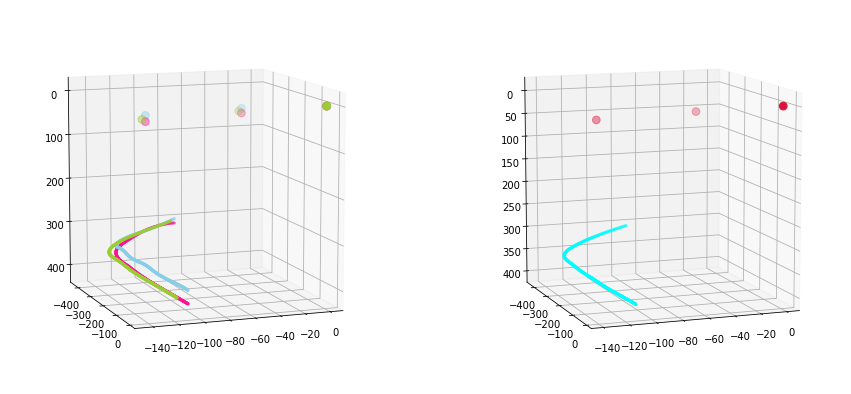

In [0]:
## Find Z positions for catheter

#AP-LAO
[Z1,Z2] = calcZ(ynew3, ynew1, 30)
cposAPLAOforAP=np.column_stack((ynew3, xnew, Z1))
cposAPLAOforLAO=np.column_stack((ynew1,xnew,Z2))

#AP-RAO
[Z1,Z2] = calcZ(ynew3, ynew2, -30)
cposAPRAOforAP=np.column_stack((ynew3, xnew, Z1))
cposAPRAOforRAO=np.column_stack((ynew2,xnew,Z2))

#RAO-LAO
[Z1,Z2] = calcZ(ynew2, ynew1, 60)
cposRAOLAOforRAO=np.column_stack((ynew2, xnew, Z1))
cposRAOLAOforLAO=np.column_stack((ynew1,xnew,Z2))

thetaRad = 30 / 180 * math.pi
ZA1 = ynew1*math.sin(thetaRad) + Z2*math.cos(thetaRad)
XA1 = ynew1*math.cos(thetaRad) - Z2*math.sin(thetaRad)

ZA1.astype(int)
XA1.astype(int)

cposRAOLAOforAP=np.column_stack((XA1,xnew,ZA1))

catheters=np.vstack((cposAPLAOforAP,cposAPRAOforAP,cposRAOLAOforAP))
meancposAP=(cposAPLAOforAP + cposAPRAOforAP + cposRAOLAOforAP)/3

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(cposAPLAOforAP[:,0],cposAPLAOforAP[:,1],cposAPLAOforAP[:,2], c='skyblue', s=5)
ax.scatter(cposAPRAOforAP[:,0],cposAPRAOforAP[:,1],cposAPRAOforAP[:,2], c='deeppink', s=5)
ax.scatter(cposRAOLAOforAP[:,0],cposRAOLAOforAP[:,1],cposRAOLAOforAP[:,2], c='yellowgreen', s=5)

ax.scatter(mposAPLAOforAP[:,0],mposAPLAOforAP[:,1],mposAPLAOforAP[:,2], c='skyblue', s=60)
ax.scatter(mposAPRAOforAP[:,0],mposAPRAOforAP[:,1],mposAPRAOforAP[:,2], c='deeppink', s=60)
ax.scatter(mposRAOLAOforAP[:,0],mposRAOLAOforAP[:,1],mposRAOLAOforAP[:,2], c='yellowgreen', s=60)
ax.view_init(-170, -70)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(meancposAP[:,0],meancposAP[:,1],meancposAP[:,2], c='cyan', s=5)
ax.scatter(centers[:,0],centers[:,1],centers[:,2], c='crimson', s=60)
ax.view_init(-170, -70)

plt.show()